# High degree linear regression

In this tutorial, you will learn basic principles of linear regression and machine learning in general. 

TensorFlow provides tools to have full control of the computations. This is done with the low-level API. On top of that, TensorFlow is equipped with a vast array of APIs to perform many machine learning algorithms. This is the high-level API. TensorFlow calls them estimators 

To understand the mechanic, you will use the low-level API provided by TensorFlow. It will be explained in the first part of the tutorial. 

In a second part of the tutorial, you will create your first linear regression using TensorFlow high-level API. 

You need to import the following libraries to run this tutorial: 

tensorflow 

numpy 

matplotlib.pyplot 

## Linear regression 

Linear regression is a type of machine learning seeking to model the relationship between a dependent variable called Y and one or more independent variables, X. Each variable is associated with a weight which in turn influences 
yˆ
, the prediction. 

Linear regression, therefore, is a straightforward technique to analyze how one variable change affects the target. 

Let’s start simple. You will try to fit an easy linear combination of only one feature. That is, you will find the best line that fit the data. 

First of all, you import the necessary libraries. 

In [0]:
import numpy as np 
import matplotlib.pyplot as plt

## Basic linear regression 

To begin with, let’s generate some data. The true model is: 

$$y=4+3x+𝜖$$
 

You add some noise to the data by adding 
$𝜖$
. The noise avoids having a straight line of points. 





In [0]:
x_train= 2*np.random.rand(100,1) 
y_train= 4+3*x_train+np.random.randn(100,1) 

You can plot the data you just generated. Your task is to find the best parameters that describe the positive relationship between 
x
 and 
y
. 

That is, you want to solve the following equation: 

$$y=𝛽+𝛼X+𝜖$$
 

If your model is good, the coefficients you will estimate will be closed to 4 and 3 for  $𝛽$ and  $𝛼$ respectively. 

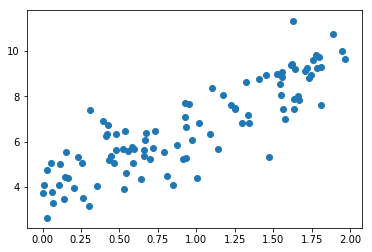

In [0]:
plt.scatter(x_train, y_train) 
plt.show() 

When you train a model, you want to find the best parameters that describe a relationship between the dependent and independent variables. To measure if the parameters reflect the reality of the data, you need to have a measure to tell how well your model is going. This measure is called a Loss function. 

A common loss function for linear regression is the Root Mean Square Error, also called RMSE: 

$$\operatorname{MSE}(X)=\frac{1}{m} \sum_{i=1}^{m}\left(\theta^{T} x^{i}-\widehat{y}^{i}\right)^{2}$$

$\begin{array}{l}{\text { Where: }} \\ {\bullet \quad \theta \text { is the weights }} \\ {\bullet \quad \widehat{y} \text { is the predicted values }}\end{array}$

The goal is to find the best 
𝜃
 that minimize the RMSE 

The model will loop over all the data to update the wait and minimize the error. This step is called an epoch. 

If you set too few epoch, you might not be able to find the lowest error. 

If you set epochs too high, the model will perform unnecessary computations simply because the weights won’t change anymore. 

A generic algorithm capable of finding the optimal weight is the gradient descent. The idea behind the gradient descent is to change the parameters iteratively to decrease the MSE. 

The gradient descent works as follow: 

Set an initial random value for each parameter. 

After each step (iteration), compute the derivative to see the sign of the change. A positive slope means, you need to move in the opposite direction, you decrease the weight to find the function minimum. 

The size of the change depends on the learning rate. If the learning rate is too small, it will take very long time for the algorithm to converge (i.e requires lots of iterations). If the learning rate is too high, the algorithm might never converge. 

In [0]:
from sklearn.linear_model import LinearRegression

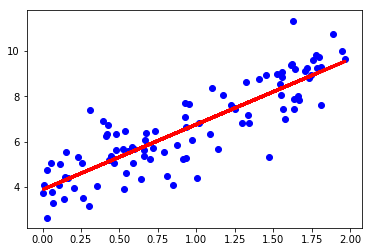

In [0]:
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_train)

plt.scatter(x_train, y_train,  color='b')
plt.plot(x_train, y_pred, color='r', linewidth=3)

## Polynomial 

The model above was rather simple and you will rarely encounter this kind of pattern that often. A more realistic pattern is when there is non-linearity in the data. 

You can capture non-linearity with a polynomial regression. For instance, if you try to estimate a polynomial regression of order 3, it means, you are estimating the following equation: 

$$y=w_{3} x^{3}+w_{2} x^{2}+w_{1} x+\beta$$

Below, you create a dataset with consecutive up and down. 

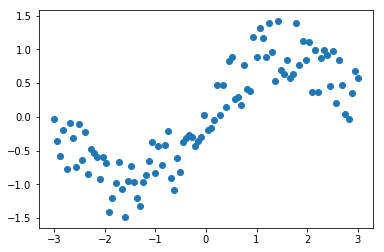

In [35]:
# Create non linearity 
n_observations = 100 
xp = np.linspace(-3, 3, n_observations) 

yp_t = np.sin(xp) + np.random.uniform(-0.5, 0.5, n_observations) 

yp = yp_t.reshape((yp_t.size, 1)) 

plt.scatter(xp, yp) 
plt.show() 

Your goal is to find the best fit for this kind of data. It is clear that you need to try a polynomial regression. This kind of pattern is preferably captured with a degree 5. 

The steps are exactly the same as above except you need to add a couple of line of codes. 

The trickiest part is the one below. You need to change the input data. Remember, you create a dataset with only two columns: $y$ and $x$ but you need to feed five tensors. 

The idea is to write a function that creates $n$ columns corresponding to each order. In our example, you need to add one column with $x1$, one with $x2$, one $x3$ and so on. 

This will become your new input data. 

In [0]:
## Reshape the data to have five columns 
def reshape_input(x , x_size,n_polynom): 
    x_input=np.zeros([x_size,n_polynom])     
    for i in range(n_polynom): 
        x_input[:,i]=np.power(x,(i+1)) 
        x_input[:,i]=x_input[:,i]/np.max(x_input[:,i]) 
    return(x_input) 

In [37]:
reshape_x = reshape_input(xp,xp.size,5)
reshape_x[:4]

array([[-1.        ,  1.        , -1.        ,  1.        , -1.        ],
       [-0.97979798,  0.96000408, -0.94061006,  0.92160784, -0.9029895 ],
       [-0.95959596,  0.92082441, -0.88361938,  0.84791759, -0.81365829],
       [-0.93939394,  0.88246097, -0.82897849,  0.77873737, -0.73154117]])

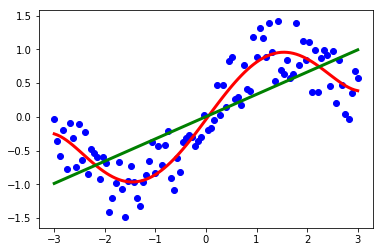

In [38]:
reg_q = LinearRegression().fit(reshape_x, yp)
reg_ = LinearRegression().fit(xp.reshape((100, 1)), yp)


y_pred_q = reg_q.predict(reshape_x)
y_pred_ = reg_.predict(xp.reshape((100, 1)))

plt.scatter(xp, yp,  color='b')
plt.plot(xp, y_pred_q, color='r', linewidth=3)
plt.plot(xp, y_pred_, color='g', linewidth=3)

## Overfitting

I mentioned above the notion of bias. I said that a model has a low bias if it predicts well the labels of the training data. If the model makes many mistakes on the training data, we say that the model has a high bias or that the model underfits. 



In [0]:
def try_manyTerms(X,Y,  terms):
  
  reshape_x = reshape_input(X , X.size, terms)
  
  reg_q = LinearRegression().fit(reshape_x, yp)
  y_pred_q = reg_q.predict(reshape_x)
  
  plt.scatter(X, Y,  color='b')
  plt.plot(X, y_pred_q, color='r', linewidth=3)

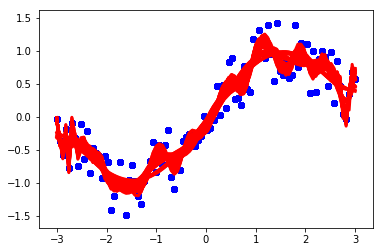

In [44]:
for q in range(5, 50):
  try_manyTerms(X = xp,Y = yp,  terms = q)

So, underfitting is the inability of the model to predict well the labels of the data it was trained on. 

There could be several reasons for underfitting, the most important of which are: 

- your model is too simple for the data (for example a linear model can often underfit); 
- the features you engineered are not informative enough. 

![](https://drive.google.com/uc?export=view&id=1Av7KeUx0DNHlWU4puhD9FJehIu7z43ot)

The first reason is easy to illustrate in the case of one-dimensional regression: the dataset can resemble a curved line, but our model is a straight line.

The second reason can be illustrated like this: let’s say you want to predict whether a patient has cancer, and the features you have are height, blood pressure, and heart rate. These three features are clearly not good predictors for cancer so our model will not be able to learn a meaningful relationship between these features and the label. 

The solution to the problem of underfitting is to try a more complex model or to engineer features with higher predictive power. 

Overfitting is another problem a model can exhibit. The model that overfits predicts very well the training data but poorly the data from at least one of the two holdout sets. Several reasons can lead to overfitting, the most important of which are:

- your model is too complex for the data (for example a very tall decision tree or a very deep or wide neural network often overfit); 
- you have too many features but a small number of training examples. 

In the literature, you can find another name for the problem of overfitting: the problem of high variance. This term comes from statistics. 

The variance is an error of the model due to its sensitivity to small fluctuations in the training set. It means that if your training data was sampled differently, the learning would result in a significantly different model. 

Which is why the model that overfits performs poorly on the test data: test and training data are sampled from the dataset independently of one another. 

Even the simplest model, such as linear, can overfit the data. That usually happens when the data is high-dimensional, but the number of training examples is relatively low.

In fact, when feature vectors are very high-dimensional, the linear learning algorithm can build a model that assigns non-zero values to most parameters $w (j)$ in the parameter vector w, trying to find very complex relationships between all available features to predict labels of training examples perfectly.

Such a complex model will most likely predict poorly the labels of the holdout examples. This is because by trying to perfectly predict labels of all training examples, the model will also learn the idiosyncrasies of the training set: the noise in the values of features of the training examples, the sampling imperfection due to the small dataset size, and other artifacts extrinsic to the decision problem at hand but present in the training set. 

Several solutions to the problem of overfitting are possible: 

1. Try a simpler model (linear instead of polynomial regression, or SVM with a linear kernel instead of RBF, a neural network with fewer layers/units). 
2. Reduce the dimensionality of examples in the dataset. 
3. Add more training data, if possible. 
4. Regularize the model. 

Regularization is the most widely used approach to prevent overfitting. 